# Wczytanie i formatowanie danych

In [1]:
import pandas as pd
from pylab import *
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from stargazer.stargazer import Stargazer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dane.csv')

In [3]:
# Rozdzielenie edukacji rodziców na podkategorie, wykształcenie podstawowe lub brak edukacji jako sytuacja bazowa
# wykształcenie średnie
df['Msec'], df['Fsec'] = 0, 0
df['Msec'].mask((df['Medu'] == 3), 1, inplace = True)
df['Msec'].mask((df['Medu'] != 3), 0, inplace = True)
df['Fsec'].mask((df['Fedu'] == 3), 1, inplace = True)
df['Fsec'].mask((df['Fedu'] != 3), 0, inplace = True)
# wykształcenie wyższe
df['Mhigh'], df['Fhigh'] = 0, 0
df['Mhigh'].mask((df['Medu'] == 4), 1, inplace = True)
df['Mhigh'].mask((df['Medu'] != 4), 0, inplace = True)
df['Fhigh'].mask((df['Fedu'] == 4), 1, inplace = True)
df['Fhigh'].mask((df['Fedu'] != 4), 0, inplace = True)

In [4]:
df.columns.values

array(['school', 'bin_sex', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'bin_guardian',
       'guardian', 'traveltime', 'bin_studytime', 'studytime',
       'had_failed', 'failures', 'bin_schoolsup', 'schoolsup',
       'bin_famsup', 'famsup', 'bin_paid', 'paid', 'bin_activities',
       'activities', 'nursery', 'bin_higher', 'higher', 'internet',
       'romantic', 'famrel', 'Kolumna1', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Msec', 'Fsec',
       'Mhigh', 'Fhigh'], dtype=object)

In [5]:
# Dataframe ze zmiennymi do wykorzystania w modelu
df_m = df[['G3','bin_sex','age','bin_studytime', 'had_failed','bin_schoolsup','bin_famsup','bin_paid','bin_activities','bin_higher','freetime','absences', 'Msec','Fsec','Mhigh','Fhigh']]

In [6]:
df_m.head()

,G3,bin_sex,age,bin_studytime,had_failed,bin_schoolsup,bin_famsup,bin_paid,bin_activities,bin_higher,freetime,absences,Msec,Fsec,Mhigh,Fhigh
0,6,1,18,0,0,1,0,0,0,1,3,6,0,0,1,1
1,6,1,17,0,0,0,1,0,0,1,3,4,0,0,0,0
2,10,1,15,0,1,1,0,1,0,1,3,10,0,0,0,0
3,15,1,15,1,0,0,1,1,1,1,2,2,0,0,1,0
4,10,1,16,0,0,0,1,1,0,1,3,4,1,1,0,0


In [7]:
# sprawdzenie typów zmiennych w df_m
df_m.dtypes

G3                int64
bin_sex           int64
age               int64
bin_studytime     int64
had_failed        int64
bin_schoolsup     int64
bin_famsup        int64
bin_paid          int64
bin_activities    int64
bin_higher        int64
freetime          int64
absences          int64
Msec              int64
Fsec              int64
Mhigh             int64
Fhigh             int64
dtype: object

In [8]:
# zmiana nazw kolumn w df_m
df_m.rename(columns={'G3':'grade', 'bin_sex':'sex', 'bin_schoolsup':'schoolsup', 'bin_famsup':'famsup','bin_paid':'paid', 'bin_activities':'activities','bin_higher':'higher', 'bin_studytime':'studytime'},inplace=True)

C:\Users\mmtom\AppData\Local\Temp\ipykernel_14356\3820305681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m.rename(columns={'G3':'grade', 'bin_sex':'sex', 'bin_schoolsup':'schoolsup', 'bin_famsup':'famsup','bin_paid':'paid', 'bin_activities':'activities','bin_higher':'higher', 'bin_studytime':'studytime'},inplace=True)


# Sprawdzenie korelacji zmiennych w modelu

In [9]:
df_ciagle = df_m[['grade', 'absences']]

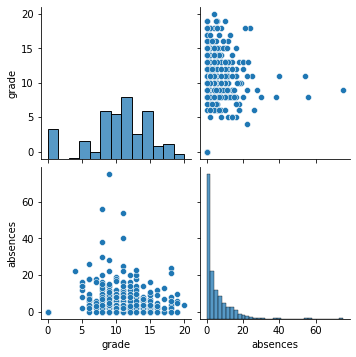

In [10]:
sns.pairplot(df_ciagle)

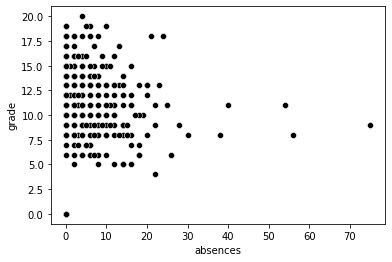

In [11]:
fig1 = sns.scatterplot(data = df_m, x = 'absences', y = 'grade', color = 'black')

In [12]:
fig1.get_figure().savefig('absencesplt.png')

In [13]:
# ponieważ zależność zmiennych absences oraz grade jest nieliniowa dodajemy zmienną absences^2
df_m['absencessq'] = df_m['absences']**2 

C:\Users\mmtom\AppData\Local\Temp\ipykernel_14356\2166758451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['absencessq'] = df_m['absences']**2


In [14]:
df_t = df_m.copy()

In [15]:
df_t.corr(method='pearson')

,grade,sex,age,studytime,had_failed,schoolsup,famsup,paid,activities,higher,freetime,absences,Msec,Fsec,Mhigh,Fhigh,absencessq
grade,1.000000,-0.103456,-0.161579,0.113623,-0.355090,-0.082788,-0.039157,0.101996,0.016100,0.182465,0.011307,0.034247,-0.014176,0.031151,0.207552,0.117569,-0.022489
sex,-0.103456,1.000000,0.028606,0.234571,-0.046129,0.138271,0.151623,0.129126,-0.099833,0.151056,-0.238744,0.066962,0.010160,-0.019336,-0.085967,-0.018346,0.085273
age,-0.161579,0.028606,1.000000,0.018561,0.288737,-0.251811,-0.140609,-0.035933,-0.103063,-0.209081,0.016434,0.175230,0.037018,-0.011971,-0.148533,-0.124286,0.111882
studytime,0.113623,0.234571,0.018561,1.000000,-0.107787,-0.015691,0.081583,0.094280,0.062118,0.127254,-0.106033,-0.088583,0.013016,0.023538,0.031659,-0.018984,-0.061803
had_failed,-0.355090,-0.046129,0.288737,-0.107787,1.000000,0.005255,-0.074633,-0.199962,-0.040218,-0.249349,0.071375,0.139293,0.074526,-0.085928,-0.231334,-0.147375,0.058933
schoolsup,-0.082788,0.138271,-0.251811,-0.015691,0.005255,1.000000,0.104681,-0.020753,0.046032,0.054486,-0.045465,0.022526,0.003793,0.053627,-0.046728,0.010650,0.016732
famsup,-0.039157,0.151623,-0.140609,0.081583,-0.074633,0.104681,1.000000,0.293184,-0.001500,0.100815,0.010538,0.024353,0.028143,0.032678,0.140649,0.147636,-0.007177
paid,0.101996,0.129126,-0.035933,0.094280,-0.199962,-0.020753,0.293184,1.000000,-0.021382,0.189214,-0.064253,0.007435,-0.062896,0.037127,0.161584,0.035659,-0.021678
activities,0.016100,-0.099833,-0.103063,0.062118,-0.040218,0.046032,-0.001500,-0.021382,1.000000,0.096484,0.089728,-0.013610,-0.074519,0.071204,0.121968,0.084410,-0.028570
higher,0.182465,0.151056,-0.209081,0.127254,-0.249349,0.054486,0.100815,0.189214,0.096484,1.000000,-0.061244,-0.056085,0.000337,0.081347,0.138153,0.103936,-0.142142


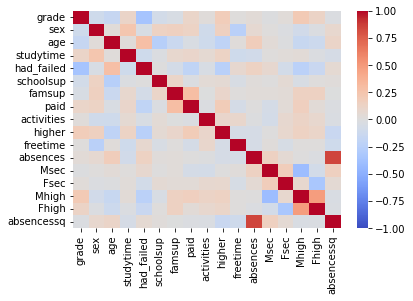

In [16]:
fig2 = sns.heatmap(df_t.corr(method='pearson'), vmin = -1, vmax=1, annot=False, cmap='coolwarm')

In [17]:
fig2.get_figure().savefig('heatmap.png')

# Model

In [18]:
m1 = smf.ols(formula = 'grade ~ sex + age + studytime + had_failed + schoolsup + famsup + absences + absencessq + paid + activities + higher + freetime + Msec + Fsec + Mhigh + Fhigh + absences*had_failed + higher*studytime', data=df_m).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     7.037
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           7.04e-15
Time:                        00:03:27   Log-Likelihood:                -1106.7
No. Observations:                 395   AIC:                             2249.
Df Residuals:                     377   BIC:                             2321.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              16.8029      3.436      4.891      0.000      10.048      23.558
sex                    -1.1072      0.456     -2.428      0.016      -2.004      -0.210
age                    -0.3982      0.183     -2.175      0.030      -0.758      -0.038
studytime               0.5934      0.257      2.307      0.022       0.088       1.099
had_failed             -5.0021      0.736     -6.796      0.000      -6.449      -3.555
schoolsup              -0.9582      0.652     -1.471      0.142      -2.239       0.323
famsup                 -0.9718      0.459     -2.118      0.035      -1.874      -0.070
absences                0.0823      0.059      1.391      0.165      -0.034       0.199
absencessq             -0.0017      0.001     -1.573      0.117      -0.004       0.000
paid                    0.2122      0.451      0.470      0.639      -0.675       1.100
activities             -0.2687      0.427     -0.630      0.529      -1.108       0.570
higher                  1.0003      1.047      0.955      0.340      -1.059       3.060
freetime                0.0975      0.216      0.452      0.652      -0.327       0.522
Msec                    0.6365      0.568      1.120      0.263      -0.481       1.754
Fsec                   -0.2932      0.564     -0.519      0.604      -1.403       0.817
Mhigh                   1.1896      0.622      1.911      0.057      -0.034       2.413
Fhigh                  -0.0414      0.640     -0.065      0.948      -1.300       1.217
absences:had_failed     0.2063      0.064      3.245      0.001       0.081       0.331
higher:studytime        0.5934      0.257      2.307      0.022       0.088       1.099
==============================================================================
Omnibus:                       29.748   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.678
Skew:                          -0.665   Prob(JB):                     2.95e-08
Kurtosis:                       3.583   Cond. No.                     1.01e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.03e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
# test na łączną nieistotność zmiennych
hip_all = '(sex = 0), (age = 0), (studytime = 0), (had_failed = 0), (schoolsup = 0), (famsup = 0), (absences = 0), (absencessq = 0), (paid = 0), (activities = 0), (higher = 0), (freetime = 0), (Msec = 0), (Fsec = 0), (Mhigh = 0), (Fhigh = 0), (absences:had_failed = 0), (higher:studytime = 0)'
m1.f_test(hip_all)
# odrzucamy H0

C:\Users\mmtom\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 17
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=7.03731280996339, p=7.0439724807816455e-15, df_denom=377, df_num=17>

In [20]:
hip1 = '(Fsec = 0), (Fhigh = 0)'
m1.f_test(hip1)
# brak podstaw do odrzucenia H0

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.1584298596306739, p=0.8535396188011103, df_denom=377, df_num=2>

In [21]:
m2 = smf.ols(formula = 'grade ~ sex + age + studytime + had_failed + schoolsup + famsup + absences + absencessq + paid + activities + higher + freetime + Msec + Mhigh + absences*had_failed + higher*studytime', data=df_m).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     7.990
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           9.94e-16
Time:                        00:03:27   Log-Likelihood:                -1106.9
No. Observations:                 395   AIC:                             2246.
Df Residuals:                     379   BIC:                             2309.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              16.8547      3.427      4.919      0.000      10.117      23.592
sex                    -1.0983      0.455     -2.416      0.016      -1.992      -0.204
age                    -0.4037      0.182     -2.213      0.028      -0.762      -0.045
studytime               0.5947      0.256      2.324      0.021       0.092       1.098
had_failed             -4.9719      0.729     -6.824      0.000      -6.405      -3.539
schoolsup              -0.9869      0.647     -1.525      0.128      -2.260       0.286
famsup                 -0.9742      0.455     -2.140      0.033      -1.870      -0.079
absences                0.0832      0.059      1.412      0.159      -0.033       0.199
absencessq             -0.0018      0.001     -1.594      0.112      -0.004       0.000
paid                    0.2123      0.449      0.473      0.636      -0.670       1.094
activities             -0.2876      0.423     -0.680      0.497      -1.120       0.544
higher                  0.9727      1.043      0.932      0.352      -1.078       3.024
freetime                0.1049      0.215      0.488      0.626      -0.318       0.527
Msec                    0.5581      0.532      1.049      0.295      -0.488       1.604
Mhigh                   1.1256      0.511      2.202      0.028       0.121       2.130
absences:had_failed     0.2051      0.063      3.247      0.001       0.081       0.329
higher:studytime        0.5947      0.256      2.324      0.021       0.092       1.098
==============================================================================
Omnibus:                       29.249   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.955
Skew:                          -0.659   Prob(JB):                     4.23e-08
Kurtosis:                       3.570   Cond. No.                     1.10e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.1e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
hip2 = '(Fsec = 0), (Fhigh = 0), (paid = 0)'
m1.f_test(hip2)
# brak podstaw do odrzucenia H0

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.17994827094716614, p=0.9099809181347192, df_denom=377, df_num=3>

In [23]:
m3 = smf.ols(formula = 'grade ~ sex + age + studytime + had_failed + schoolsup + famsup + absences + absencessq + activities + higher + freetime + Msec + Mhigh + absences*had_failed + higher*studytime', data=df_m).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     8.562
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.65e-16
Time:                        00:03:27   Log-Likelihood:                -1107.0
No. Observations:                 395   AIC:                             2244.
Df Residuals:                     380   BIC:                             2304.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              16.8063      3.422      4.912      0.000      10.079      23.534
sex                    -1.0856      0.453     -2.394      0.017      -1.977      -0.194
age                    -0.3991      0.182     -2.193      0.029      -0.757      -0.041
studytime               0.5974      0.256      2.338      0.020       0.095       1.100
had_failed             -5.0254      0.719     -6.989      0.000      -6.439      -3.612
schoolsup              -1.0001      0.646     -1.548      0.122      -2.270       0.270
famsup                 -0.9177      0.439     -2.091      0.037      -1.781      -0.055
absences                0.0832      0.059      1.414      0.158      -0.032       0.199
absencessq             -0.0018      0.001     -1.602      0.110      -0.004       0.000
activities             -0.2938      0.423     -0.695      0.487      -1.125       0.537
higher                  1.0231      1.037      0.987      0.324      -1.015       3.061
freetime                0.1014      0.215      0.473      0.637      -0.320       0.523
Msec                    0.5497      0.531      1.035      0.301      -0.494       1.594
Mhigh                   1.1416      0.509      2.241      0.026       0.140       2.143
absences:had_failed     0.2071      0.063      3.291      0.001       0.083       0.331
higher:studytime        0.5974      0.256      2.338      0.020       0.095       1.100
==============================================================================
Omnibus:                       30.188   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.330
Skew:                          -0.669   Prob(JB):                     2.13e-08
Kurtosis:                       3.597   Cond. No.                     4.33e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.28e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
hip3 = '(Fsec = 0), (Fhigh = 0), (paid = 0), (freetime = 0)'
m1.f_test(hip3)
# brak podstaw do odrzucenia H0

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.1904722877842231, p=0.9433207258295702, df_denom=377, df_num=4>

In [25]:
m4 = smf.ols(formula = 'grade ~ sex + age + studytime + had_failed + schoolsup + famsup + absences + absencessq + activities + higher + Msec + Mhigh + absences*had_failed + higher*studytime', data=df_m).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     9.222
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.29e-16
Time:                        00:03:27   Log-Likelihood:                -1107.1
No. Observations:                 395   AIC:                             2242.
Df Residuals:                     381   BIC:                             2298.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              17.1270      3.350      5.112      0.000      10.540      23.714
sex                    -1.1270      0.444     -2.536      0.012      -2.001      -0.253
age                    -0.3976      0.182     -2.187      0.029      -0.755      -0.040
studytime               0.5902      0.255      2.316      0.021       0.089       1.091
had_failed             -5.0065      0.717     -6.980      0.000      -6.417      -3.596
schoolsup              -1.0063      0.645     -1.560      0.120      -2.275       0.262
famsup                 -0.9066      0.438     -2.070      0.039      -1.768      -0.046
absences                0.0847      0.059      1.443      0.150      -0.031       0.200
absencessq             -0.0018      0.001     -1.658      0.098      -0.004       0.000
activities             -0.2782      0.421     -0.661      0.509      -1.106       0.549
higher                  1.0068      1.035      0.973      0.331      -1.028       3.042
Msec                    0.5594      0.530      1.055      0.292      -0.483       1.602
Mhigh                   1.1434      0.509      2.247      0.025       0.143       2.144
absences:had_failed     0.2061      0.063      3.279      0.001       0.083       0.330
higher:studytime        0.5902      0.255      2.316      0.021       0.089       1.091
==============================================================================
Omnibus:                       29.822   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.788
Skew:                          -0.665   Prob(JB):                     2.79e-08
Kurtosis:                       3.586   Cond. No.                     1.01e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.08e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
hip4 = '(Fsec = 0), (Fhigh = 0), (paid = 0),(freetime = 0), (activities = 0)'
m1.f_test(hip4)
# brak podstaw do odrzucenia H0

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.23906611903167702, p=0.9450519007171484, df_denom=377, df_num=5>

In [27]:
m5 = smf.ols(formula = 'grade ~ sex + age + studytime + had_failed + schoolsup + famsup + absences + absencessq + higher + Msec + Mhigh + absences*had_failed + higher*studytime', data=df_m).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     9.969
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           4.84e-17
Time:                        00:03:27   Log-Likelihood:                -1107.4
No. Observations:                 395   AIC:                             2241.
Df Residuals:                     382   BIC:                             2292.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              16.9232      3.334      5.077      0.000      10.369      23.478
sex                    -1.0916      0.441     -2.476      0.014      -1.958      -0.225
age                    -0.3902      0.181     -2.152      0.032      -0.747      -0.034
studytime               0.5748      0.254      2.267      0.024       0.076       1.073
had_failed             -5.0404      0.715     -7.051      0.000      -6.446      -3.635
schoolsup              -1.0249      0.644     -1.591      0.112      -2.291       0.242
famsup                 -0.9005      0.437     -2.059      0.040      -1.761      -0.040
absences                0.0823      0.059      1.406      0.160      -0.033       0.197
absencessq             -0.0018      0.001     -1.638      0.102      -0.004       0.000
higher                  0.9457      1.030      0.918      0.359      -1.080       2.971
Msec                    0.5739      0.529      1.084      0.279      -0.467       1.614
Mhigh                   1.1201      0.507      2.208      0.028       0.123       2.118
absences:had_failed     0.2098      0.063      3.355      0.001       0.087       0.333
higher:studytime        0.5748      0.254      2.267      0.024       0.076       1.073
==============================================================================
Omnibus:                       30.288   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.447
Skew:                          -0.671   Prob(JB):                     2.01e-08
Kurtosis:                       3.593   Cond. No.                     1.32e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.51e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
hip5 = '(Fsec = 0), (Fhigh = 0), (paid = 0),(freetime = 0), (activities = 0), (schoolsup = 0)'
m1.f_test(hip5)
# brak podstaw do odrzucenia H0

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.6169691996913164, p=0.7167605950942857, df_denom=377, df_num=6>

In [29]:
m6 = smf.ols(formula = 'grade ~ sex + age + studytime + had_failed + famsup + absences + absencessq + higher + Msec + Mhigh + absences*had_failed + higher*studytime', data=df_m).fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     10.60
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           4.58e-17
Time:                        00:03:27   Log-Likelihood:                -1108.7
No. Observations:                 395   AIC:                             2241.
Df Residuals:                     383   BIC:                             2289.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              15.5803      3.231      4.821      0.000       9.227      21.934
sex                    -1.1871      0.438     -2.713      0.007      -2.048      -0.327
age                    -0.3126      0.175     -1.786      0.075      -0.657       0.031
studytime               0.5869      0.254      2.311      0.021       0.087       1.086
had_failed             -5.1206      0.715     -7.167      0.000      -6.525      -3.716
famsup                 -0.9438      0.437     -2.157      0.032      -1.804      -0.084
absences                0.0767      0.059      1.311      0.191      -0.038       0.192
absencessq             -0.0017      0.001     -1.583      0.114      -0.004       0.000
higher                  0.9413      1.032      0.912      0.362      -1.088       2.971
Msec                    0.6020      0.530      1.136      0.257      -0.440       1.644
Mhigh                   1.1821      0.507      2.332      0.020       0.186       2.179
absences:had_failed     0.2130      0.063      3.401      0.001       0.090       0.336
higher:studytime        0.5869      0.254      2.311      0.021       0.087       1.086
==============================================================================
Omnibus:                       28.782   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.251
Skew:                          -0.655   Prob(JB):                     6.02e-08
Kurtosis:                       3.550   Cond. No.                     1.09e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.14e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
# adj.R^2 mniejsze po usunięciu zmiennej schoolsup więc cofamy jej usunięcie
hip6 = '(Fsec = 0), (Fhigh = 0), (paid = 0),(freetime = 0), (activities = 0), (absencessq = 0)'
m1.f_test(hip6)
# brak podstaw do odrzucenia H0

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.6420457337517598, p=0.6965608378293551, df_denom=377, df_num=6>

In [31]:
m7 = smf.ols(formula = 'grade ~ sex + age + studytime + had_failed + schoolsup + famsup + absences + higher + Msec + Mhigh + absences*had_failed + higher*studytime', data=df_m).fit()
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     10.58
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           4.91e-17
Time:                        00:03:27   Log-Likelihood:                -1108.8
No. Observations:                 395   AIC:                             2242.
Df Residuals:                     383   BIC:                             2289.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              16.4824      3.330      4.950      0.000       9.935      23.030
sex                    -1.1493      0.440     -2.610      0.009      -2.015      -0.283
age                    -0.3655      0.181     -2.018      0.044      -0.722      -0.009
studytime               0.5564      0.254      2.191      0.029       0.057       1.056
had_failed             -5.1096      0.715     -7.144      0.000      -6.516      -3.703
schoolsup              -0.9898      0.645     -1.534      0.126      -2.258       0.279
famsup                 -0.8609      0.438     -1.967      0.050      -1.722      -0.000
absences                0.0011      0.031      0.036      0.971      -0.060       0.062
higher                  1.2510      1.015      1.232      0.219      -0.745       3.247
Msec                    0.5501      0.530      1.038      0.300      -0.492       1.592
Mhigh                   1.1614      0.508      2.287      0.023       0.163       2.160
absences:had_failed     0.2377      0.060      3.942      0.000       0.119       0.356
higher:studytime        0.5564      0.254      2.191      0.029       0.057       1.056
==============================================================================
Omnibus:                       35.366   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.390
Skew:                          -0.721   Prob(JB):                     3.78e-10
Kurtosis:                       3.745   Cond. No.                     5.05e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.12e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
st = Stargazer([m1,m2,m3,m4,m5,m6, m7])
st.covariate_order(['Intercept', 'sex', 'age', 'studytime', 'had_failed', 'schoolsup', 'famsup', 'absences', 'absencessq', 'paid', 'activities', 'higher', 'freetime', 'Msec', 'Fsec', 'Mhigh', 'Fhigh', 'absences:had_failed', 'higher:studytime'])
st.show_degrees_of_freedom(True)
st

In [33]:
with open('stargazer.html', 'w')  as f:
    f.write(st.render_html())

# Testy

Najlepszy model pod względem skorygowanego R^2 to m5 -> więc ten model będzie analizowany

#### Homoskedastyczność

In [34]:
df_m['residuals'] = m5.resid
df_m['predictions'] = m5.predict()

C:\Users\mmtom\AppData\Local\Temp\ipykernel_14356\4105760887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['residuals'] = m5.resid
C:\Users\mmtom\AppData\Local\Temp\ipykernel_14356\4105760887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['predictions'] = m5.predict()


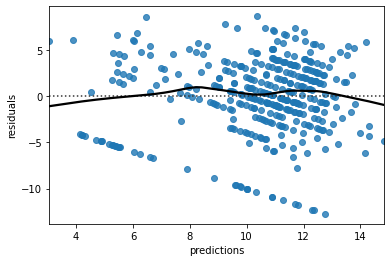

In [35]:
rf = sns.residplot(data = df_m, x = 'predictions' , y = 'residuals', lowess = True, line_kws = dict(color = 'black'))
rf.get_figure().savefig('residvsfitted.png')

In [36]:
test_bp = sms.het_breuschpagan(m5.resid, m5.model.exog)
test_bp
# odrzucamy H0

(24.649865157897356,
 0.025652300920754986,
 2.1187716713742097,
 0.015136917706654318)

In [37]:
test_white = sms.het_white(m5.resid, m5.model.exog)
test_white
# odrzucamy H0

(99.78683996158261,
 0.029441897170760074,
 1.4376957063206988,
 0.017494462374840168)

In [38]:
# model 5 z wykorzystaniem macierzy odpornej
m5_robust = smf.ols(formula = 'grade ~ sex + age + studytime + had_failed + schoolsup + famsup + absences + absencessq + higher + Msec + Mhigh + absences*had_failed + higher*studytime', data=df_m).fit(cov_type = 'HC0')
m5_robust.summary()

C:\Users\mmtom\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 13, but rank is 12
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     9.105
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.86e-15
Time:                        00:03:27   Log-Likelihood:                -1107.4
No. Observations:                 395   AIC:                             2241.
Df Residuals:                     382   BIC:                             2292.
Df Model:                          12                                         
Covariance Type:                  HC0                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              16.9232      3.434      4.928      0.000      10.192      23.654
sex                    -1.0916      0.419     -2.604      0.009      -1.913      -0.270
age                    -0.3902      0.183     -2.130      0.033      -0.749      -0.031
studytime               0.5748      0.264      2.175      0.030       0.057       1.093
had_failed             -5.0404      0.823     -6.124      0.000      -6.653      -3.427
schoolsup              -1.0249      0.585     -1.751      0.080      -2.172       0.122
famsup                 -0.9005      0.429     -2.100      0.036      -1.741      -0.060
absences                0.0823      0.061      1.360      0.174      -0.036       0.201
absencessq             -0.0018      0.001     -1.749      0.080      -0.004       0.000
higher                  0.9457      1.230      0.769      0.442      -1.465       3.356
Msec                    0.5739      0.517      1.111      0.267      -0.438       1.586
Mhigh                   1.1201      0.489      2.291      0.022       0.162       2.078
absences:had_failed     0.2098      0.068      3.076      0.002       0.076       0.344
higher:studytime        0.5748      0.264      2.175      0.030       0.057       1.093
==============================================================================
Omnibus:                       30.288   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.447
Skew:                          -0.671   Prob(JB):                     2.01e-08
Kurtosis:                       3.593   Cond. No.                     1.32e+18
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The smallest eigenvalue is 3.51e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
st_robust = Stargazer([m5,m5_robust])
st_robust.covariate_order(['Intercept', 'sex', 'age', 'studytime', 'had_failed', 'schoolsup', 'famsup', 'absences', 'absencessq', 'higher', 'Msec', 'Mhigh', 'absences:had_failed', 'higher:studytime'])
st_robust

In [40]:
with open('stargazer_robust.html', 'w')  as f:
    f.write(st_robust.render_html())

#### Brak autokorelacji składnika losowego

In [41]:
bg = sms.acorr_breusch_godfrey(m5)
bg
# brak podstaw do odrzucenia H0

(14.922117416160757,
 0.1349272202767878,
 1.4604974225479521,
 0.1522547725310554)

In [42]:
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     9.969
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           4.84e-17
Time:                        00:03:27   Log-Likelihood:                -1107.4
No. Observations:                 395   AIC:                             2241.
Df Residuals:                     382   BIC:                             2292.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              16.9232      3.334      5.077      0.000      10.369      23.478
sex                    -1.0916      0.441     -2.476      0.014      -1.958      -0.225
age                    -0.3902      0.181     -2.152      0.032      -0.747      -0.034
studytime               0.5748      0.254      2.267      0.024       0.076       1.073
had_failed             -5.0404      0.715     -7.051      0.000      -6.446      -3.635
schoolsup              -1.0249      0.644     -1.591      0.112      -2.291       0.242
famsup                 -0.9005      0.437     -2.059      0.040      -1.761      -0.040
absences                0.0823      0.059      1.406      0.160      -0.033       0.197
absencessq             -0.0018      0.001     -1.638      0.102      -0.004       0.000
higher                  0.9457      1.030      0.918      0.359      -1.080       2.971
Msec                    0.5739      0.529      1.084      0.279      -0.467       1.614
Mhigh                   1.1201      0.507      2.208      0.028       0.123       2.118
absences:had_failed     0.2098      0.063      3.355      0.001       0.087       0.333
higher:studytime        0.5748      0.254      2.267      0.024       0.076       1.073
==============================================================================
Omnibus:                       30.288   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.447
Skew:                          -0.671   Prob(JB):                     2.01e-08
Kurtosis:                       3.593   Cond. No.                     1.32e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.51e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Poprawność formy funkcyjnej

Test RESET

In [43]:
sms.linear_reset(m5, power = 3, test_type = 'fitted')
# brak podstaw do odrzucenia H0

C:\Users\mmtom\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=0.9926192004297164, p-value=0.6087731356001533, df_denom=2>

Test Chowa

In [44]:
m5_chow = smf.ols(formula = 'grade ~ sex + age + studytime + had_failed + schoolsup + famsup + absences + absencessq + higher + Msec + Mhigh + absences*had_failed + higher*studytime', data=df_m).fit()
m5_chow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     9.969
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           4.84e-17
Time:                        00:03:27   Log-Likelihood:                -1107.4
No. Observations:                 395   AIC:                             2241.
Df Residuals:                     382   BIC:                             2292.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              16.9232      3.334      5.077      0.000      10.369      23.478
sex                    -1.0916      0.441     -2.476      0.014      -1.958      -0.225
age                    -0.3902      0.181     -2.152      0.032      -0.747      -0.034
studytime               0.5748      0.254      2.267      0.024       0.076       1.073
had_failed             -5.0404      0.715     -7.051      0.000      -6.446      -3.635
schoolsup              -1.0249      0.644     -1.591      0.112      -2.291       0.242
famsup                 -0.9005      0.437     -2.059      0.040      -1.761      -0.040
absences                0.0823      0.059      1.406      0.160      -0.033       0.197
absencessq             -0.0018      0.001     -1.638      0.102      -0.004       0.000
higher                  0.9457      1.030      0.918      0.359      -1.080       2.971
Msec                    0.5739      0.529      1.084      0.279      -0.467       1.614
Mhigh                   1.1201      0.507      2.208      0.028       0.123       2.118
absences:had_failed     0.2098      0.063      3.355      0.001       0.087       0.333
higher:studytime        0.5748      0.254      2.267      0.024       0.076       1.073
==============================================================================
Omnibus:                       30.288   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.447
Skew:                          -0.671   Prob(JB):                     2.01e-08
Kurtosis:                       3.593   Cond. No.                     1.32e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.51e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
df_m['guardian'] = df['bin_guardian']

C:\Users\mmtom\AppData\Local\Temp\ipykernel_14356\3463405299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['guardian'] = df['bin_guardian']


In [46]:
m5_chow1 = smf.ols(formula = 'grade ~ sex + age + studytime + had_failed + schoolsup + famsup + absences + absencessq + higher + Msec + Mhigh + absences*had_failed + higher*studytime', data=df_m[df_m['guardian'] == 1]).fit()
m5_chow1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     7.436
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           9.31e-12
Time:                        00:03:28   Log-Likelihood:                -763.03
No. Observations:                 273   AIC:                             1552.
Df Residuals:                     260   BIC:                             1599.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              20.7540      4.413      4.703      0.000      12.064      29.444
sex                    -1.2348      0.539     -2.293      0.023      -2.295      -0.174
age                    -0.6224      0.239     -2.609      0.010      -1.092      -0.153
studytime               0.4031      0.307      1.314      0.190      -0.201       1.007
had_failed             -5.4481      1.037     -5.256      0.000      -7.489      -3.407
schoolsup              -0.6840      0.780     -0.877      0.381      -2.220       0.852
famsup                 -1.2615      0.527     -2.393      0.017      -2.300      -0.223
absences                0.0324      0.068      0.473      0.637      -0.102       0.167
absencessq             -0.0008      0.001     -0.629      0.530      -0.003       0.002
higher                  1.2403      1.329      0.934      0.351      -1.376       3.856
Msec                    0.5484      0.668      0.821      0.413      -0.767       1.864
Mhigh                   1.3835      0.621      2.227      0.027       0.160       2.607
absences:had_failed     0.2811      0.091      3.077      0.002       0.101       0.461
higher:studytime        0.4031      0.307      1.314      0.190      -0.201       1.007
==============================================================================
Omnibus:                       23.709   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.122
Skew:                          -0.684   Prob(JB):                     7.82e-07
Kurtosis:                       3.776   Cond. No.                     3.44e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.67e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
m5_chow2 = smf.ols(formula = 'grade ~ sex + age + studytime + had_failed + schoolsup + famsup + absences + absencessq + higher + Msec + Mhigh + absences*had_failed + higher*studytime', data=df_m[df_m['guardian'] == 0]).fit()
m5_chow2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     3.685
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           0.000116
Time:                        00:03:28   Log-Likelihood:                -336.99
No. Observations:                 122   AIC:                             700.0
Df Residuals:                     109   BIC:                             736.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.2477      5.498      2.046      0.043       0.351      22.145
sex                    -1.0415      0.805     -1.294      0.198      -2.637       0.554
age                    -0.0296      0.297     -0.100      0.921      -0.617       0.558
studytime               1.0682      0.468      2.281      0.024       0.140       1.996
had_failed             -5.7456      1.209     -4.753      0.000      -8.141      -3.350
schoolsup              -1.4991      1.172     -1.280      0.203      -3.821       0.823
famsup                 -0.2691      0.789     -0.341      0.734      -1.833       1.295
absences                0.2709      0.123      2.199      0.030       0.027       0.515
absencessq             -0.0113      0.005     -2.379      0.019      -0.021      -0.002
higher                  0.0452      1.838      0.025      0.980      -3.599       3.689
Msec                    0.5409      0.943      0.574      0.567      -1.328       2.410
Mhigh                   0.8889      0.958      0.928      0.355      -1.009       2.787
absences:had_failed     0.2773      0.151      1.831      0.070      -0.023       0.578
higher:studytime        1.0682      0.468      2.281      0.024       0.140       1.996
==============================================================================
Omnibus:                       17.669   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.564
Skew:                          -0.837   Prob(JB):                     2.08e-05
Kurtosis:                       4.199   Cond. No.                     3.42e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.32e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
# statystyka F
licznik = (m5.ssr - m5_chow1.ssr - m5_chow2.ssr)/len(m5.params)*(2-1)
mianownik = (m5_chow1.ssr + m5_chow2.ssr)/(m5.nobs - 2*len(m5.params))
F = licznik/mianownik
F

0.9808532847020167

In [49]:
import scipy.stats

In [50]:
scipy.stats.f.ppf(q = 1-0.05, dfn = len(m5.params)*(2-1), dfd = (m5.nobs - 2*len(m5.params)))

1.7187950390636428

F nie należy do obszaru krytycznego K = (1.7188; +inf) => brak podstaw do odrzucenia H0 \
Parametry w podpróbkach są stabilne => założenie o liniowości jest spełnione

#### Składnik losowy ma rozkład normalny

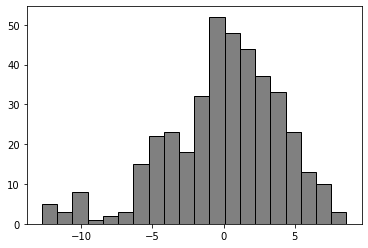

In [51]:
hist(m5.resid, bins = 20, color = 'gray', edgecolor = 'black')
show()

C:\Users\mmtom\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


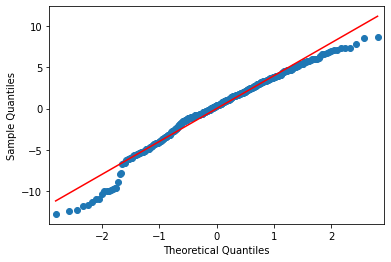

In [52]:
sm.qqplot(m5.resid, line = 'r', color = 'black')
show()

In [53]:
test_jb = sms.jarque_bera(m5.resid)
test_jb
# odrzucamy H0 => brak rozkładu normalnego reszt

(35.447203973414325,
 2.007878630942855e-08,
 -0.6713128038812959,
 3.592545899364266)

## Obserwacje odstające

In [54]:
for row in m5.resid:
    if row>9:
        print(row, end = " ")

In [55]:
plt.rc('figure', figsize = (12,8))

In [56]:
h_lev = (2*len(m5.params))/m5.nobs

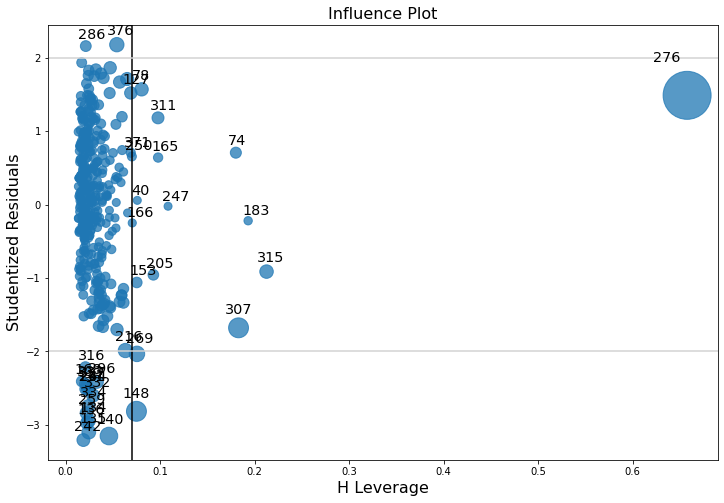

In [57]:
fig = sm.graphics.influence_plot(m5, criterion = 'Cooks')
axvline(x = round(h_lev, 2), color = 'black')
axhline(y=2, color = 'lightgrey')
axhline(y=-2, color = 'lightgrey')
show()

In [58]:
fig.savefig('wykres.png')

## Współliniowość

In [59]:
def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif


In [60]:
exogs = ['sex','age','studytime','had_failed','schoolsup','famsup','absences', 'absencessq', 'higher','Msec','Mhigh','absences:had_failed','higher:studytime']

In [61]:
get_vif(exogs, df_m)

C:\Users\mmtom\AppData\Local\Temp\ipykernel_14356\2909414556.py:36: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
C:\Users\mmtom\AppData\Local\Temp\ipykernel_14356\2909414556.py:36: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)


,VIF,Tolerance
sex,1.160864,0.861427
age,1.279294,0.781681
studytime,inf,0.000000
had_failed,2.032220,0.492073
schoolsup,1.117825,0.894594
famsup,1.088083,0.919048
absences,5.244192,0.190687
absencessq,4.206742,0.237714
higher,1.222169,0.818217
Msec,1.260165,0.793547
